In [24]:
import pandas as pd
import numpy as np


#un_filtered dataset
df = pd.read_csv("msamd_14454.csv", low_memory=False)
action_taken = df[['action_taken','state_code', 'census_tract']]
# action_taken.head()
# df.head()

#new_df boston, when actions_taken = 1; when actions_taken = 1, it means we only focus on the loan origionated. 
new_df = pd.read_csv("msamd_14454_actions_taken_1.csv", low_memory=False)
# new_df['action_taken']

# new_df.head()
print(new_df.columns.values.tolist())
# loan_application_record = new_df[['state_code','county_code','derived_msa-md','census_tract','action_taken','loan_amount','total_loan_costs']]
# loan_application_record['census_tract'] = loan_application_record['census_tract'].astype(float)
# loan_application_record['loan_amount'] = loan_application_record['loan_amount'].astype(float)
#Problem occurs: loan_amount fails to be collected together for each census tract, but 
#groupby() is doing its work. 
# mean = loan_application_record.groupby('census_tract')['loan_amount'].mean()
# mean

# average load for sullfolk county(25025.0) is 577590.272660
# avg_loan_ma = loan_application_record.groupby('county_code')['loan_amount'].mean()
# avg_loan_ma
# loan_application_record.tail(100)







['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code', 'census_tract', 'conforming_loan_limit', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'hoepa_status', 'total_loan_costs', 'total_points_and_fees', 'origination_charges', 'discount_points', 'lender_credits', 'loan_term', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'other_nonamortizing_features', 'property_value', 'construction_method', 'occupancy_type', 'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'total_units', 'multifamily_affordable_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score

In [2]:
#filtered data: action_taken =1(when actions_taken = 1, it means we only focus on the loan origionated), only at sufflok county
import matplotlib.pyplot as plt
from decimal import Decimal

# print(new_df.columns.values.tolist())



loan_application_record = new_df[['state_code','county_code','derived_msa-md','census_tract','action_taken','loan_amount','total_loan_costs']]
loan_application_record['census_tract'] = loan_application_record['census_tract'].astype(int,errors='ignore')
loan_application_record['loan_amount'] = loan_application_record['loan_amount'].astype(float)
loan_application_record
# loan_application_record.to_csv('loan_amount_bos.csv')


/var/folders/yy/pdmswf251qs2tdymzfxsjbj40000gn/T/ipykernel_10655/3081902794.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_application_record['census_tract'] = loan_application_record['census_tract'].astype(int,errors='ignore')
/var/folders/yy/pdmswf251qs2tdymzfxsjbj40000gn/T/ipykernel_10655/3081902794.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_application_record['loan_amount'] = loan_application_record['loan_amount'].astype(float)


,state_code,county_code,derived_msa-md,census_tract,action_taken,loan_amount,total_loan_costs
0,MA,25025.0,14454,2.502502e+10,1,10005000.0,NaN
1,MA,25025.0,14454,2.502502e+10,1,10005000.0,NaN
2,MA,25023.0,14454,2.502350e+10,1,1005000.0,6214.45
3,MA,25021.0,14454,2.502142e+10,1,1005000.0,5694.45
4,MA,25021.0,14454,2.502140e+10,1,1005000.0,4073.1
...,...,...,...,...,...,...,...
100773,MA,25025.0,14454,2.502509e+10,1,995000.0,3037.5
100774,MA,25025.0,14454,2.502509e+10,1,995000.0,NaN
100775,MA,25021.0,14454,2.502144e+10,1,995000.0,NaN
100776,MA,25025.0,14454,2.502501e+10,1,995000.0,NaN


In [3]:
#find why there is an outlier has great mean loan_amount
row =new_df.loc[new_df['census_tract'] == 25025080801]
row['loan_amount']

8051    14755000.0
Name: loan_amount, dtype: float64

In [4]:
avg_bos = loan_application_record.groupby('derived_msa-md')['loan_amount'].mean()
avg_bos

derived_msa-md
14454    459600.408819
Name: loan_amount, dtype: float64

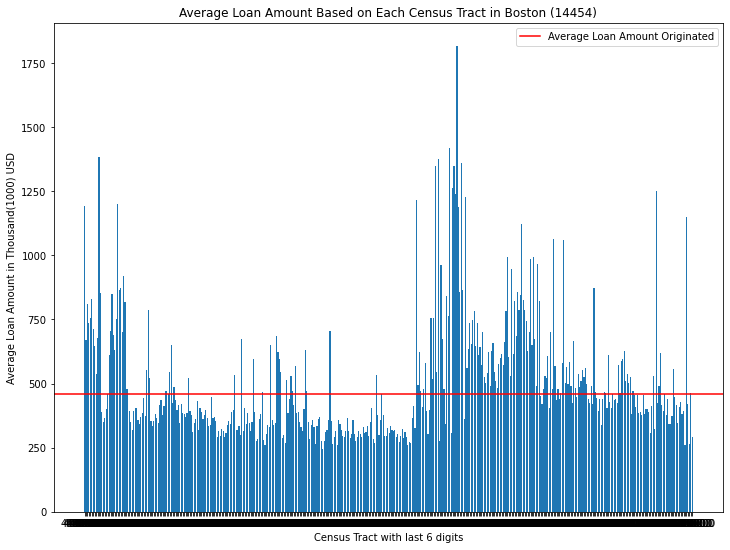

In [5]:
#filtered data: action_taken =1(when actions_taken = 1, it means we only focus on the loan origionated), only at sufflok county
import matplotlib.pyplot as plt
from decimal import Decimal
# average loan_amount for each census tract

mean = loan_application_record.groupby('census_tract',as_index=False)['loan_amount'].mean()
# mean.to_csv('avg_loan_each_census_tract_bos.csv')
# mean
# list(mean.columns)

#find and remove the outlier
# mean=mean.loc[mean['loan_amount']!=mean['loan_amount'].max()]
origional_mean = mean.copy(deep=True)
#for the sick of the plotting, i need to make the average loan amount 1000 times smaller.
mean['loan_amount'] = (mean['loan_amount']/1000)
mean['loan_amount'] = np.round(mean['loan_amount'], decimals = 3)#for better plotting
# maxValueIndex = mean.idxmax() #index of the max(outliar) avg loan amount for census tract is 84

# index of the min avg loan amount for census tract 
# minValueIndex = mean[['loan_amount']].idxmin()

#find and remove the outlier
mean=mean.loc[mean['loan_amount']!=mean['loan_amount'].max()]

maxValueIndex = mean.idxmax()#index of the max avg loan amount for census tract 

# #to keep a copy of the dataset before editing the census tracts for each area
# origional_mean = mean.copy(deep=True)
# orgional_mean
#for the sick of the plotting,
mean['census_tract'] = mean['census_tract'].astype(str)
#census tract for areas in suffolk county all start with 25025, so remove 25025 to only show last 6 digits
mean['census_tract'] =mean['census_tract'].str[5:]#for better plotting




plt.figure(figsize=(12,9))
plt.bar(mean['census_tract'],mean['loan_amount'])
plt.title("Average Loan Amount Based on Each Census Tract in Boston (14454)")
plt.xlabel("Census Tract with last 6 digits")
plt.ylabel("Average Loan Amount in Thousand(1000) USD")
avg_bos = loan_application_record.groupby('derived_msa-md')['loan_amount'].mean()

avg = 459600.408819/1000

average_amount=plt.axhline(y=avg, linestyle="-",color="red")
plt.legend(['Average Loan Amount Originated'])

plt.savefig('Average Loan Amount(remove outlier) Based on Each Census Tract in Boston City(14454).png')

,census_tract,loan_amount
0,400100.0,1191.524
1,400200.0,668.959
2,400300.0,809.149
3,400400.0,737.669
4,400500.0,757.113
...,...,...
418,981202.0,1150.000
419,981300.0,419.921
420,981502.0,265.000
421,981700.0,465.000


In [6]:
val = mean['loan_amount'].max()
mean.loc[mean['loan_amount'] == val]


,census_tract,loan_amount
258,010702.0,1816.456


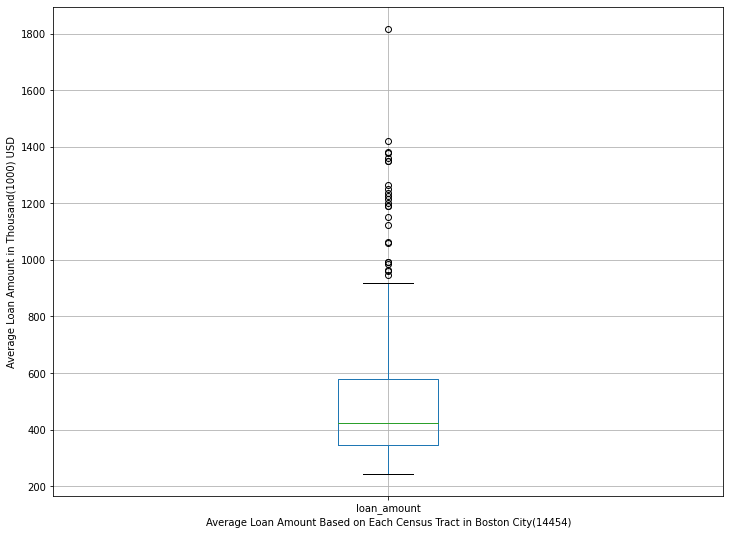

In [7]:
plt.figure(figsize=(12,9))
plt.ylabel("Average Loan Amount in Thousand(1000) USD")
plt.xlabel("Average Loan Amount Based on Each Census Tract in Boston City(14454)")
mean.boxplot(column = 'loan_amount')
plt.savefig('Boxplot Average Loan Amount Based on Each Census Tract in Boston City(14454).png')

In [8]:
origional_mean
origional_mean.dtypes

census_tract    float64
loan_amount     float64
dtype: object

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
shapefile_path = "../spark/census_tract_map/Census2020_Tracts.shp"

tracts = gpd.read_file(shapefile_path)
plt.figure(figsize=(8,6))
# tracts.crs = 'epsg:4326'
# tracts =tracts.to_crs("EPSG:4326")
# tracts.iloc[0,:]

# learning to use geopandas
# tracts['centroid'] = tracts.centroid
# tracts = tracts.set_geometry("centroid")
# ax = tracts["geometry"].plot()
# tracts["centroid"].plot(ax=ax, color="black")

# tracts["area"] = tracts.area
# tracts.plot("area", legend=True)

tracts['GEOID20'] = tracts['GEOID20'].astype(float)

tracts['avg_loan_amount'] = tracts['GEOID20'].map(origional_mean.set_index('census_tract')['loan_amount'])


tracts

#with the missing data
# tracts.plot(column='avg_loan_amount');
# ax.set_axis_off()





,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry,avg_loan_amount
0,1,25,025,140202,2.502514e+10,1402.02,Census Tract,G5020,S,1538599,17120,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2...",401804.123711
1,2,25,025,140300,2.502514e+10,1403,Census Tract,G5020,S,1548879,38736,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2...",390248.868778
2,3,25,025,140400,2.502514e+10,1404,Census Tract,G5020,S,1874512,11680,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2...",305352.564103
3,4,25,025,140106,2.502514e+10,1401.06,Census Tract,G5020,S,278837,3116,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2...",456764.705882
4,5,25,025,110201,2.502511e+10,1102.01,Census Tract,G5020,S,348208,0,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2...",404841.269841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,25,025,061202,2.502506e+10,612.02,Census Tract,G5020,S,380810,4897,+42.3387527,-071.0625085,4.151441e+06,9863.203623,"POLYGON ((773636.394 2947776.746, 773641.530 2...",NaN
203,204,25,025,070801,2.502507e+10,708.01,Census Tract,G5020,S,61235,0,+42.3399771,-071.0825322,6.590784e+05,3324.809260,"POLYGON ((768450.923 2949304.833, 768550.937 2...",NaN
204,205,25,025,060601,2.502506e+10,606.01,Census Tract,G5020,S,140332,0,+42.3392514,-071.0489604,1.510420e+06,5135.560328,"POLYGON ((777185.384 2949170.447, 777313.336 2...",NaN
205,206,25,025,070901,2.502507e+10,709.01,Census Tract,G5020,S,57691,0,+42.3377169,-071.0795662,6.209278e+05,3841.042994,"POLYGON ((769230.210 2948676.359, 769406.112 2...",NaN


<Figure size 576x432 with 0 Axes>

In [10]:
nan_count = tracts['avg_loan_amount'].isna().sum()
nan_count

56

In [11]:
tracts.dtypes

OBJECTID              int64
STATEFP20            object
COUNTYFP20           object
TRACTCE20            object
GEOID20             float64
NAME20               object
NAMELSAD20           object
MTFCC20              object
FUNCSTAT20           object
ALAND20               int64
AWATER20              int64
INTPTLAT20           object
INTPTLON20           object
Shape_STAr          float64
Shape_STLe          float64
geometry           geometry
avg_loan_amount     float64
dtype: object

<AxesSubplot:>

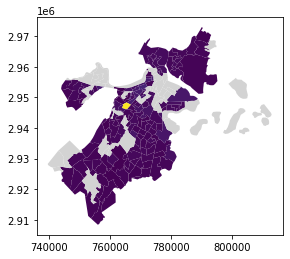

In [12]:
tracts.plot(column='avg_loan_amount', missing_kwds={'color': 'lightgrey'})

0      Annotation(759764, 2.91602e+06, '140202')
1      Annotation(759349, 2.91957e+06, '140300')
2      Annotation(761453, 2.92341e+06, '140400')
3      Annotation(754500, 2.92543e+06, '140106')
4      Annotation(759797, 2.92747e+06, '110201')
                         ...                    
202    Annotation(774505, 2.94848e+06, '061202')
203    Annotation(769032, 2.94919e+06, '070801')
204    Annotation(778110, 2.94897e+06, '060601')
205    Annotation(769838, 2.94837e+06, '070901')
206    Annotation(762814, 2.95627e+06, '981501')
Length: 207, dtype: object

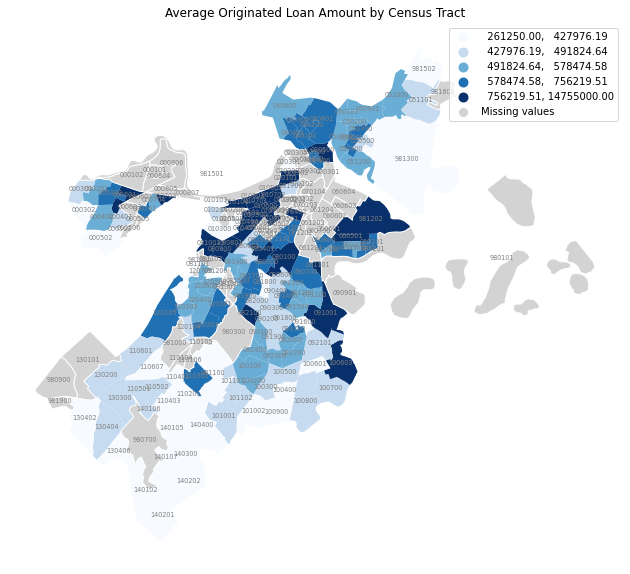

In [13]:
# tracts.loc[np.random.choice(tracts.index), 'avg_loan_amount'] = np.nan
nan_count = tracts['avg_loan_amount'].isna().sum()
# print(nan_count)
# tracts.plot(column='avg_loan_amount', missing_kwds={'color': 'lightgrey'})

ax = tracts.plot(
    column="avg_loan_amount",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    cmap='Blues',
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "label": "Missing values"
    }
)
plt.title("Average Originated Loan Amount by Census Tract")

ax.set_axis_off()
size = 6.5
tracts.apply(lambda x: ax.annotate(text=x['TRACTCE20'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=size,color = 'grey'), axis=1)

# plt.savefig('Map for Average Loan Amount in Boston')

#MISSING about 30% of avg loan amount data for census tracts
# print(tracts['avg_loan_amount'].value_counts())
# print(tracts['GEOID20'].value_counts())


# ax.set_axis_off()

In [14]:
#double checking the mapping
tracts.loc[tracts['GEOID20'] == 25025120105]
origional_mean.loc[origional_mean['census_tract'] == 25025120105]

,census_tract,loan_amount
373,2.502512e+10,588976.608187


In [15]:
tracts

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry,avg_loan_amount
0,1,25,025,140202,2.502514e+10,1402.02,Census Tract,G5020,S,1538599,17120,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2...",401804.123711
1,2,25,025,140300,2.502514e+10,1403,Census Tract,G5020,S,1548879,38736,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2...",390248.868778
2,3,25,025,140400,2.502514e+10,1404,Census Tract,G5020,S,1874512,11680,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2...",305352.564103
3,4,25,025,140106,2.502514e+10,1401.06,Census Tract,G5020,S,278837,3116,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2...",456764.705882
4,5,25,025,110201,2.502511e+10,1102.01,Census Tract,G5020,S,348208,0,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2...",404841.269841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,25,025,061202,2.502506e+10,612.02,Census Tract,G5020,S,380810,4897,+42.3387527,-071.0625085,4.151441e+06,9863.203623,"POLYGON ((773636.394 2947776.746, 773641.530 2...",NaN
203,204,25,025,070801,2.502507e+10,708.01,Census Tract,G5020,S,61235,0,+42.3399771,-071.0825322,6.590784e+05,3324.809260,"POLYGON ((768450.923 2949304.833, 768550.937 2...",NaN
204,205,25,025,060601,2.502506e+10,606.01,Census Tract,G5020,S,140332,0,+42.3392514,-071.0489604,1.510420e+06,5135.560328,"POLYGON ((777185.384 2949170.447, 777313.336 2...",NaN
205,206,25,025,070901,2.502507e+10,709.01,Census Tract,G5020,S,57691,0,+42.3377169,-071.0795662,6.209278e+05,3841.042994,"POLYGON ((769230.210 2948676.359, 769406.112 2...",NaN


<AxesSubplot:>

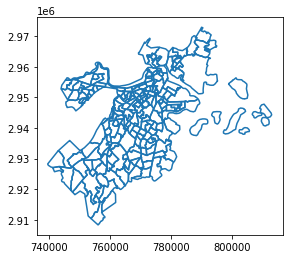

In [16]:
tracts.boundary.plot()

In [17]:
#to see all digits of census tract
# origional_mean['census_tract'] = origional_mean['census_tract'].astype(str)
# origional_mean

<AxesSubplot:>

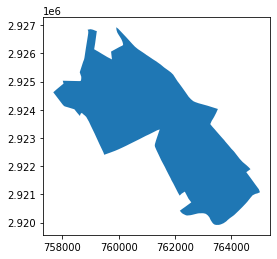

In [18]:
# tracts.iloc[0]
shiprock = tracts[tracts["GEOID20"] == 25025140400]
shiprock.plot()

In [19]:
# average load for sullfolk county(25025.0) is 577590.272660
avg_loan_bos = loan_application_record.groupby('county_code')['loan_amount'].mean()
avg_loan_bos

#index of the max avg loan amount for census tract is 28
index_max= maxValueIndex['loan_amount']
max_row = mean.iloc[index_max]


max_loan= max_row.values[1]
max_loan_census_tract = max_row.values[0]
# max_loan # = 1816456
# max_loan_census_tract# =25025010702

# min avg loan amount for census tract is
min_loan= mean['loan_amount'].min()
min_loan_census_tract = mean.loc[mean['loan_amount'] == min_loan]
min_loan_census_tract = min_loan_census_tract.values[0]
min_loan_census_tract
# min_loan  = 244480
# min_loan_census_tract = 25025510502


#create new dataframe for avg, max and min

# avgrow = {'census_tract':['25025000000'], 'Loan Amount':['459600.408819']}
# maxrow = {'census_tract':['25025010702'], 'Loan Amount':['1816456']}
# minrow = {'census_tract':['25025981100'], 'Loan Amount':['261250']}
# summary_data = pd.DataFrame(avgrow,maxrow,minrow,index=['average_amount','max_amount','min_amount'])

summary_data = pd.DataFrame()
summary_data['Index'] = ['average_amount', 'max_amount', 'min_amount']
summary_data['census_tract'] = ['25025000000', '25025010702', '25025510502']
summary_data['census_tract'] = (summary_data['census_tract']).apply(Decimal)
summary_data['Loan Amount'] = [459600.408819, 1816456, 244480]
  

# summary_data = pd.concat([summary_data, maxrow])

summary_data
summary_data.to_csv('summary_data_bos.csv')

# max_loan_ma = mean['loan_amount'].max()
# max_loan_ma
# loan_application_record.tail(100)
# avg_loan_ma.to_csv('avg_loan_sufflok_county.csv')


In [20]:
max_loan_census_tract


'010702.0'

In [21]:
import pandas as pd
bos_census = pd.read_csv("2020-census-for-boston-race-age-housing.csv", low_memory=False)
bos_census.head(10)
list(bos_census.columns.values)

#P0020001 = TOTAL population

#P0040001=Total population 18 years and over
#

['FILEID',
 'STUSAB',
 'SUMLEV',
 'GEOID',
 'GEOCODE',
 'REGION',
 'DIVISION',
 'STATE',
 'COUNTY',
 'COUSUB',
 'TRACT',
 'P0020001',
 'P0020005',
 'P0020006',
 'P0020002',
 'P0020008',
 'P0020007',
 'P0020009',
 'P0020010',
 'P0020011',
 'P0040001',
 'P0040005',
 'P0040006',
 'P0040002',
 'P0040008',
 'P0040007',
 'P0040009',
 'P0040010',
 'P0040011',
 'P0050001',
 'P0050002',
 'P0050003',
 'P0050004',
 'P0050005',
 'P0050006',
 'P0050007',
 'P0050008',
 'P0050009',
 'P0050010',
 'H0010001',
 'H0010002',
 'H0010003']

In [22]:
bos_census.drop(['FILEID', 'STUSAB','SUMLEV',
 'GEOID','REGION',
 'DIVISION',
 'STATE',
 'COUNTY',
 'COUSUB','TRACT','P0050009','P0050001','P0050002','P0050003','P0050004','P0050005','P0050006',
 'P0050007','P0050008','P0050010'], axis=1)

,GEOCODE,P0020001,P0020005,P0020006,P0020002,P0020008,P0020007,P0020009,P0020010,P0020011,...,P0040006,P0040002,P0040008,P0040007,P0040009,P0040010,P0040011,H0010001,H0010002,H0010003
0,Geographic Code Identifier,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,...,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total:,Occupied,Vacant
1,25025140105,3592,1131,1083,1149,77,4,0,24,124,...,873,896,63,4,0,21,93,1344,1287,57
2,25025050901,4242,1091,77,2749,92,2,0,90,141,...,66,1999,84,2,0,58,110,1504,1412,92
3,25025101101,3522,108,2436,752,28,7,0,35,156,...,1919,484,25,4,0,30,117,1317,1233,84
4,25025020302,1293,1007,42,100,90,0,0,8,46,...,42,81,90,0,0,8,38,803,744,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,25025061202,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,25025980101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,25025981201,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,25025981900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
